In [1]:
import pandas as pd
import plotly.graph_objects as go

# Load and transform databases

In [2]:
provinces = pd.read_csv('provinces.csv')
provinces.head()

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,1,68,ECU,Ecuador,1,Azuay,EC.AZ,NaN,NaN,Provincia,Province,NaN,NaN
1,2,68,ECU,Ecuador,2,Bolivar,EC.BO,NaN,NaN,Provincia,Province,NaN,NaN
2,3,68,ECU,Ecuador,3,Cañar,EC.CN,NaN,NaN,Provincia,Province,NaN,NaN
3,4,68,ECU,Ecuador,4,Carchi,EC.CR,NaN,NaN,Provincia,Province,NaN,NaN
4,5,68,ECU,Ecuador,5,Chimborazo,EC.CB,NaN,NaN,Provincia,Province,NaN,NaN


In [3]:
common = {
  'area': str,
}
question_1 = {
  's101p121': str,
  's101p122': str,
  's101p123': str,
  's101p124': str,
  's101p125': str,
  's101p126': str,
}
question_2 = {
  's101p11': str,
  's101p12a': str,
  's101p12b': str,
  's101p12c': str,
  's101p12d': str,
  's101p12e': str,
}
question_3 = {
    's101p61': str,
  's101p62': str,
  's101p63': str,
  's101p64': str,
  's101p65': str,
  's101p66': str,
  's101p67': str,
  's101p68': str,
}
question_4 = {
  's101p71': str,
  's101p72': str,
  's101p73': str,
  's101p74': str,
  's101p75': str,
  's101p76': str,
  's101p77': str,
}

convert_dict = {**common, **question_1, **question_2, **question_3, **question_4}
convert_dict_sm = {**common, **question_1}

In [4]:
ambiental_2018 = pd.read_csv('ambiental_2018.csv')
ambiental_2018 = ambiental_2018.astype(convert_dict)
ambiental_2018.info()
ambiental_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12368 entries, 0 to 12367
Columns: 110 entries, area to P14
dtypes: float64(1), int64(14), object(95)
memory usage: 10.4+ MB


/var/folders/9f/krhpqyz55zs0jmwtnw2jsddc0000gn/T/ipykernel_69802/3562599315.py:1: DtypeWarning: Columns (10,11,12,13,14,16,17,18,19,20,25,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,105,109) have mixed types. Specify dtype option on import or set low_memory=False.
  ambiental_2018 = pd.read_csv('ambiental_2018.csv')


,area,ciudad,conglomerado,vivienda,hogar,estrato4,fexp4,sel,upm,id_hogar,...,s101p183,S12P9,S12P13,S12P16,S12P16C,P1,NACIONAL,ciudad_num,P12,P14
0,2,170184,909202,5,1,3023,1776.490234,1,170184909202,170184909202051,...,4,1,1,1,1,1,1,170184,2,2
1,1,30450,5405,3,1,312,330.985199,1,30450005405,30450005405031,...,1,1,1,1,1,1,1,30450,1,2
2,2,180750,902901,5,1,1822,390.731506,1,180750902901,180750902901051,...,3,1,1,1,1,1,1,180750,2,2
3,1,50150,10504,9,1,512,162.877426,1,50150010504,50150010504091,...,3,1,1,1,1,1,1,50150,1,2
4,1,20550,901,5,1,212,93.333824,1,20550000901,20550000901051,...,5,1,1,1,1,2,1,20550,1,2


In [5]:
ambiental_2019 = pd.read_csv('ambiental_2019.csv')
ambiental_2019 = ambiental_2019.astype(convert_dict)
ambiental_2019 = ambiental_2019.replace('urbana', '1')
ambiental_2019 = ambiental_2019.replace('rural', '2')
ambiental_2019.info()
ambiental_2019.head()

/var/folders/9f/krhpqyz55zs0jmwtnw2jsddc0000gn/T/ipykernel_69802/174151756.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  ambiental_2019 = pd.read_csv('ambiental_2019.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Columns: 109 entries, area to id_hogar
dtypes: float64(1), int64(52), object(56)
memory usage: 9.6+ MB


,area,ciudad,conglomerado,vivienda,hogar,s101p11,s101p12a,s101p12b,s101p12c,s101p12d,...,s101p175,s101p176,s101p181,s101p182,s101p183,s101obs,upm,fexp4,estrato4,id_hogar
0,1,10150,1804,1,1,1,1,1,1,1,...,3,1,1,5,5,,10150001804,374.31235,2712,10150001804011
1,1,10150,1804,2,1,1,1,1,1,1,...,5,5,1,5,1,,10150001804,374.31235,2712,10150001804021
2,1,10150,1804,4,1,1,1,1,2,2,...,3,1,5,4,5,,10150001804,374.31235,2712,10150001804041
3,1,10150,1804,6,1,1,1,1,1,1,...,5,1,3,3,5,,10150001804,374.31235,2712,10150001804061
4,1,10150,1804,7,1,2,1,2,2,2,...,3,3,2,4,5,,10150001804,374.31235,2712,10150001804071


In [6]:
ambiental_2022_08 = pd.read_csv('ambiental_2022_08.csv')
ambiental_2022_08 = ambiental_2022_08.astype(convert_dict)
ambiental_2022_08.info()
ambiental_2022_08.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12368 entries, 0 to 12367
Columns: 110 entries, area to P14
dtypes: float64(1), int64(14), object(95)
memory usage: 10.4+ MB


/var/folders/9f/krhpqyz55zs0jmwtnw2jsddc0000gn/T/ipykernel_69802/3388256505.py:1: DtypeWarning: Columns (10,11,12,13,14,16,17,18,19,20,25,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,105,109) have mixed types. Specify dtype option on import or set low_memory=False.
  ambiental_2022_08 = pd.read_csv('ambiental_2022_08.csv')


,area,ciudad,conglomerado,vivienda,hogar,estrato4,fexp4,sel,upm,id_hogar,...,s101p183,S12P9,S12P13,S12P16,S12P16C,P1,NACIONAL,ciudad_num,P12,P14
0,2,170184,909202,5,1,3023,1776.490234,1,170184909202,170184909202051,...,4,1,1,1,1,1,1,170184,2,2
1,1,30450,5405,3,1,312,330.985199,1,30450005405,30450005405031,...,1,1,1,1,1,1,1,30450,1,2
2,2,180750,902901,5,1,1822,390.731506,1,180750902901,180750902901051,...,3,1,1,1,1,1,1,180750,2,2
3,1,50150,10504,9,1,512,162.877426,1,50150010504,50150010504091,...,3,1,1,1,1,1,1,50150,1,2
4,1,20550,901,5,1,212,93.333824,1,20550000901,20550000901051,...,5,1,1,1,1,2,1,20550,1,2


In [7]:
ambiental_2022_10 = pd.read_csv('ambiental_2022_10.csv')
ambiental_2022_10 = ambiental_2022_10.astype(convert_dict_sm)
ambiental_2022_10.info()
ambiental_2022_10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8864 entries, 0 to 8863
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          8864 non-null   object 
 1   ciudad        8864 non-null   int64  
 2   conglomerado  8864 non-null   int64  
 3   panelm        8864 non-null   int64  
 4   vivienda      8864 non-null   int64  
 5   hogar         8864 non-null   int64  
 6   s91p7         8864 non-null   int64  
 7   s91p8a        8864 non-null   int64  
 8   s91p8b        8864 non-null   int64  
 9   s91p8c        8864 non-null   int64  
 10  s91p8d        8864 non-null   int64  
 11  s101p121      8864 non-null   object 
 12  s101p122      8864 non-null   object 
 13  s101p123      8864 non-null   object 
 14  s101p124      8864 non-null   object 
 15  s101p125      8864 non-null   object 
 16  s101p126      8864 non-null   object 
 17  s91p10        8864 non-null   int64  
 18  s91p111       8864 non-null 

,area,ciudad,conglomerado,panelm,vivienda,hogar,s91p7,s91p8a,s91p8b,s91p8c,...,s91p126,s91p131,s91p132,s91p133,estrato,fexp4,upm,id_vivienda,id_hogar,periodo
0,1,10150,1101,28,2,1,1,6,5,5,...,2,2,4,5,2713,402.832298,10150001101,1015000110102802,10150001101028021,202210
1,1,10150,1101,28,3,1,1,1,2,2,...,5,5,5,5,2713,402.832298,10150001101,1015000110102803,10150001101028031,202210
2,1,10150,1101,28,4,1,1,1,2,2,...,2,2,4,4,2713,402.832298,10150001101,1015000110102804,10150001101028041,202210
3,1,10150,1101,28,6,1,1,6,2,2,...,2,2,5,5,2713,402.832298,10150001101,1015000110102806,10150001101028061,202210
4,1,10150,1101,28,8,1,1,6,5,5,...,2,5,5,5,2713,402.832298,10150001101,1015000110102808,10150001101028081,202210


For the next questions, 1 will be taken as Yes and 2 as No

For the next questions, 1 will be taken as Urban and 2 as Rural

In [8]:
years = [2018, 2019, 2022]
areas = ['1', '2']

dbs = {
  2018: ambiental_2018,
  2019: ambiental_2019,
  2022: ambiental_2022_08
}

dbs_2 = {
  2018: ambiental_2018,
  2019: ambiental_2019,
  2022: ambiental_2022_10
}

# Environmental Problems

### Household yearly count related to the 7 environmental problems

s101p121: Publicidad, carteles, cables, antenas, postes

s101p122: Agua contaminada

s101p123: Ruidos excesivos

s101p124: Acumulación de Basura

s101p125: Contaminación del aire

s101p126: Presencia de animales callejeros

s101p127: Excretas de animales en espacios públicos

In [9]:
envs_cols = ['s101p121', 's101p122', 's101p123', 's101p124', 's101p125', 's101p126']

,years,households
0,2018,3516956.0
1,2019,3125148.0
2,2022,3173594.0


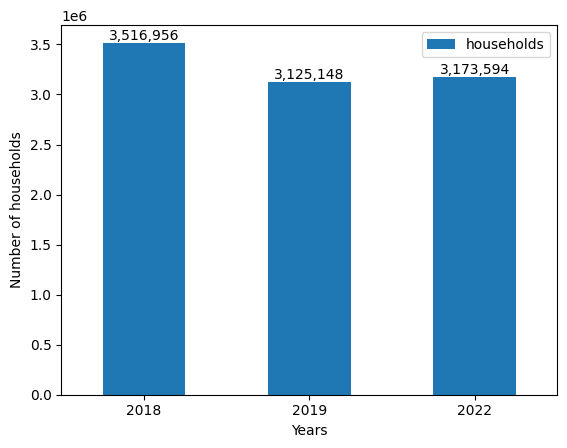

In [10]:
res = []

for year in years:
  db = dbs_2[year]
  db = db.loc[(db['s101p121'] == '1') | (db['s101p122'] == '1') | (db['s101p123'] == '1') | (db['s101p124'] == '1') | (db['s101p125'] == '1') | (db['s101p126'] == '1')]
  res.append(db['fexp4'].sum().round(0))

res = pd.DataFrame({'years':years, 'households':res})
ax = res.plot.bar(x='years', y='households', rot=0, ylabel='Number of households', xlabel='Years')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,Urban,Rural
2018,2674391.0,842565.0
2019,2406094.0,719054.0
2022,2588373.0,585221.0


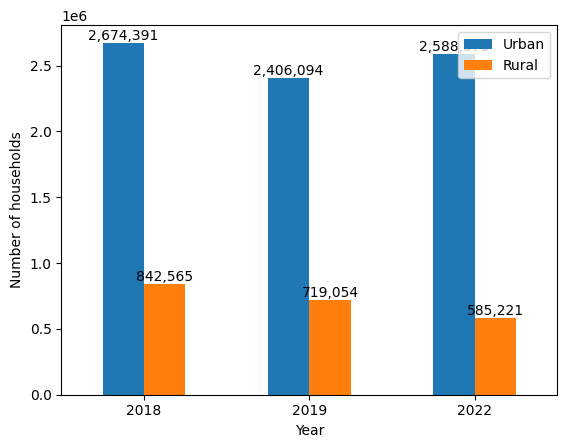

In [11]:
res = []

for year in years:
  db = dbs_2[year]
  for area in areas:
    db1 = db.loc[((db['s101p121'] == '1') | (db['s101p122'] == '1') | (db['s101p123'] == '1') | (db['s101p124'] == '1') | (db['s101p125'] == '1') | (db['s101p126'] == '1')) & (db['area'] == area)]
    res.append(db1['fexp4'].sum().round(0))

res = pd.DataFrame({'Urban': res[::2], 'Rural': res[1::2]}, index=years)
ax = res.plot.bar(rot=0, ylabel='Number of households', xlabel='Year')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,2018,2019,2022
Visual\npollution,13,13,12
Contaminated\nwater,14,11,11
Hearing\npollution,17,18,20
Accumulated\ngarbage,16,15,16
Air\npollution,18,18,18
Stray\nanimals,22,25,24


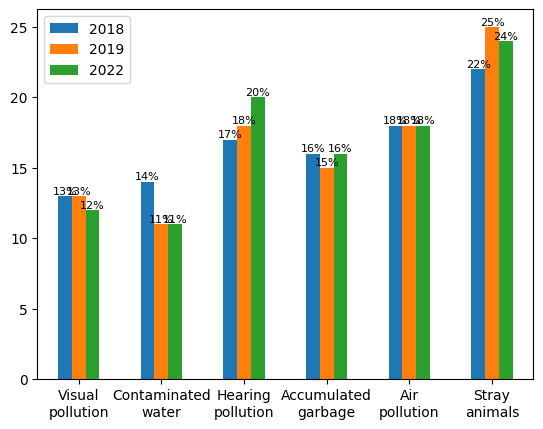

In [12]:
res = {
  2018: [],
  2019: [],
  2022: []
}
res_per = {
  2018: 0,
  2019: 0,
  2022: 0
}

for year in years:
  db = dbs_2[year]
  tmp = []
  sum = 0
  for col in envs_cols:
    db1 = db[db[col] == '1']
    val = db1['fexp4'].sum().round(0)
    tmp.append(val)
    sum += val

  res[year] = tmp
  res_per[year] = sum

for year in res:
  res[year] = list(map(lambda a: round(a/res_per[year]*100), res[year]))

res = pd.DataFrame(res, index=['Visual\npollution', 'Contaminated\nwater', 'Hearing\npollution', 'Accumulated\ngarbage', 'Air\npollution', 'Stray\nanimals'])
ax = res.plot.bar(rot=0)
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}%', fontsize=8)
res

In [13]:
fig = go.Figure()

for year in res:
  fig.add_trace(go.Scatterpolar(
    r=res[year],
    theta=['Visual pollution', 'Contaminated water', 'Hearing pollution', 'Accumulated garbage', 'Air pollution', 'Stray animals'],
    fill='toself',
    name=year
  ))

fig.show()

# Waste Sorting

### Household yearly count related to waist types

s101p11: Orgánicos

s101p12a: Inorgánicos: A - Papel, cartón

s101p12b: Inorgánicos: B - Plástico

s101p12c: Inorgánicos: C - Vidrio

s101p12d: Inorgánicos: D - Metal

s101p12e: Inorgánicos: E - Tetrapak


In [14]:
waste_cols = ['s101p11', 's101p12a', 's101p12b', 's101p12c', 's101p12d', 's101p12e']

,years,households
0,2018,2506851.0
1,2019,2845055.0
2,2022,2506851.0


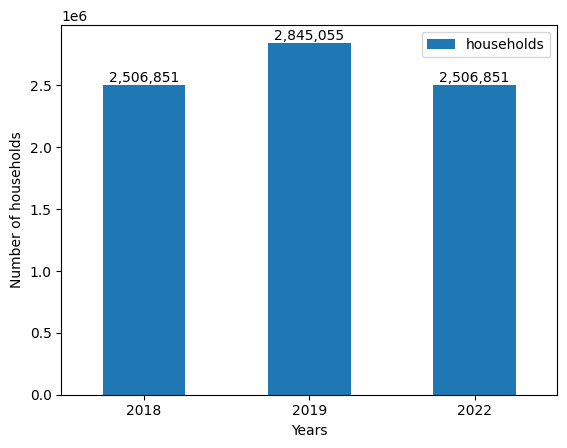

In [15]:
res = []

for year in years:
  db = dbs[year]
  db = db.loc[(db['s101p11'] == '1') | (db['s101p12a'] == '1') | (db['s101p12b'] == '1') | (db['s101p12c'] == '1') | (db['s101p12d'] == '1') | (db['s101p12e'] == '1')]
  res.append(db['fexp4'].sum().round(0))

res = pd.DataFrame({'years':years, 'households':res})
ax = res.plot.bar(x='years', y='households', rot=0, ylabel='Number of households', xlabel='Years')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,Urban,Rural
2018,1630107.0,876744.0
2019,1824627.0,1020428.0
2022,1630107.0,876744.0


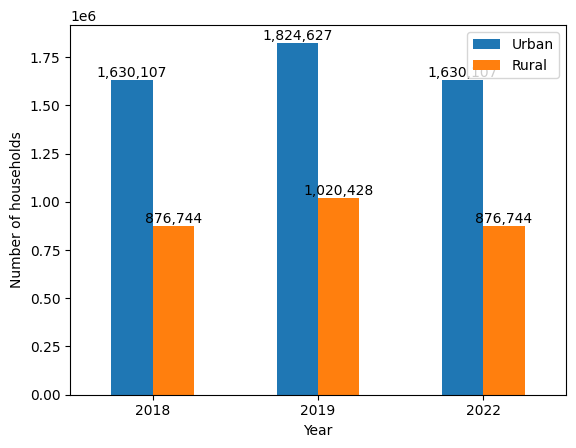

In [16]:
res = []

for year in years:
  db = dbs[year]
  tmp = []
  for area in areas:
    db1 = db.loc[((db['s101p11'] == '1') | (db['s101p12a'] == '1') | (db['s101p12b'] == '1') | (db['s101p12c'] == '1') | (db['s101p12d'] == '1') | (db['s101p12e'] == '1')) & (db['area'] == area)]
    res.append(db1['fexp4'].sum().round(0))

res = pd.DataFrame({'Urban': res[::2], 'Rural': res[1::2]}, index=years)
ax = res.plot.bar(rot=0, ylabel='Number of households', xlabel='Year')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,2018,2019,2022
Organic,23,23,23
Inorganic\nA,22,22,22
Inorganic\nB,26,26,26
Inorganic\nC,12,11,12
Inorganic\nD,11,12,11
Inorganic\nE,7,6,7


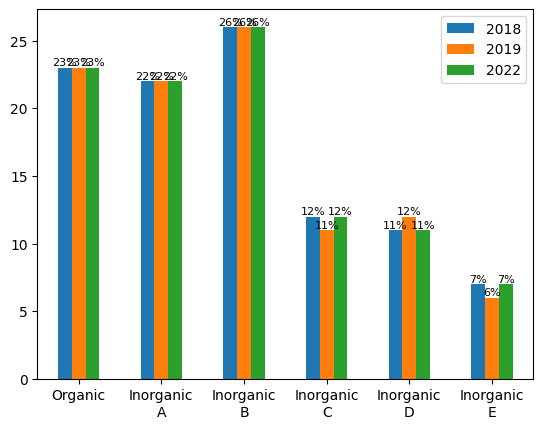

In [17]:
res = {
  2018: [],
  2019: [],
  2022: []
}
res_per = {
  2018: 0,
  2019: 0,
  2022: 0
}

for year in years:
  db = dbs[year]
  tmp = []
  sum = 0
  for col in waste_cols:
    db1 = db.loc[db[col] == '1']
    val = db1['fexp4'].sum().round(0)
    tmp.append(val)
    sum += val

  res[year] = tmp
  res_per[year] = sum

for year in res:
  res[year] = list(map(lambda a: round(a/res_per[year]*100), res[year]))

res = pd.DataFrame(res, index=['Organic', 'Inorganic\nA', 'Inorganic\nB', 'Inorganic\nC', 'Inorganic\nD', 'Inorganic\nE'])
ax = res.plot.bar(rot=0)
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}%', fontsize=8)
res

In [18]:
fig = go.Figure()

for year in res:
  fig.add_trace(go.Scatterpolar(
    r=res[year],
    theta=['Organic', 'Inorganic A', 'Inorganic B', 'Inorganic C', 'Inorganic D', 'Inorganic E'],
    fill='toself',
    name=year
  ))

fig.show()

# Water saving practice

### Household yearly count related to Water saving practice

s101p61: ¿Reusan el agua (para regar, fregar, tirar al baño)?

s101p62: ¿Utiliza balde en lugar de manguera para ciertas actividades?

s101p63: ¿Cierran las llaves mientras jabonan los platos, se bañan, se cepillan los dientes, etc.?

s101p64: ¿Se duchan en menos de 10 minutos?

s101p65: ¿Revisan regularmente las tuberías?

s101p66: ¿Disponen de economizadores de chorro (reductores de flujo del agua)?

s101p67: ¿Disponen de inodoro doble descarga?

s101p68: ¿Colocan una botella de agua u otro objeto dentro del tanque del inodoro?


In [19]:
water_cols = ['s101p61', 's101p62', 's101p63', 's101p64', 's101p65', 's101p66', 's101p67', 's101p68']

,years,households
0,2018,4478414.0
1,2019,4457512.0
2,2022,4478414.0


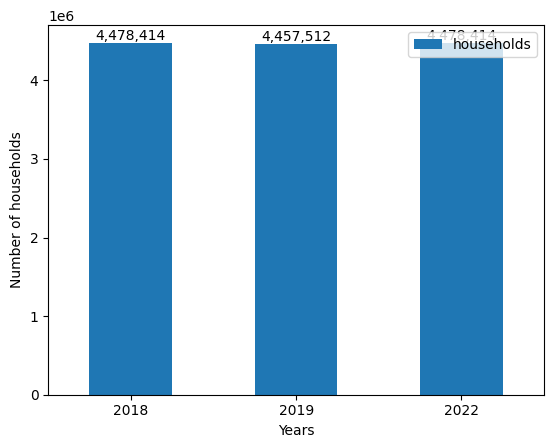

In [20]:
res = []

for year in years:
  db = dbs[year]
  db = db.loc[(db['s101p61'] == '1') | (db['s101p62'] == '1') | (db['s101p63'] == '1') | (db['s101p64'] == '1') | (db['s101p65'] == '1') | (db['s101p66'] == '1') | (db['s101p67'] == '1') | (db['s101p68'] == '1')]
  res.append(db['fexp4'].sum().round(0))

res = pd.DataFrame({'years':years, 'households':res})
ax = res.plot.bar(x='years', y='households', rot=0, ylabel='Number of households', xlabel='Years')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,Urban,Rural
2018,3188356.0,1290058.0
2019,3139129.0,1318383.0
2022,3188356.0,1290058.0


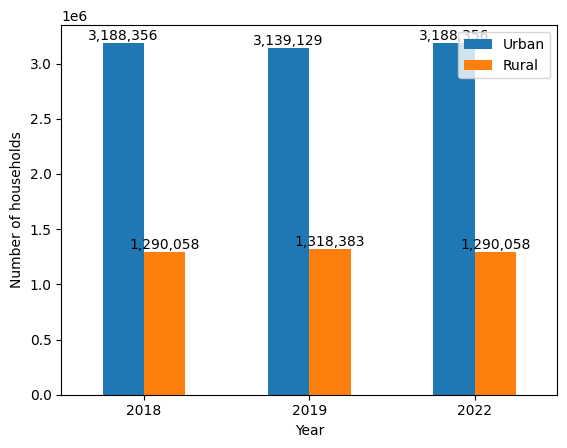

In [21]:
res = []

for year in years:
  db = dbs[year]
  tmp = []
  for area in areas:
    db1 = db.loc[((db['s101p61'] == '1') | (db['s101p62'] == '1') | (db['s101p63'] == '1') | (db['s101p64'] == '1') | (db['s101p65'] == '1') | (db['s101p66'] == '1') | (db['s101p67'] == '1') | (db['s101p68'] == '1')) & (db['area'] == area)]
    res.append(db1['fexp4'].sum().round(0))

res = pd.DataFrame({'Urban': res[::2], 'Rural': res[1::2]}, index=years)
ax = res.plot.bar(rot=0, ylabel='Number of households', xlabel='Year')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,2018,2019,2022
Reuse\nthe\nwater,13,14,13
Use\nbucket\ninstead\nof hos,16,18,16
Close\nthe\ntaps,25,24,25
Shower\nin <10\nminutes,19,19,19
Check\nthe\npipes,16,16,16
Use of\neconomizers,4,4,4
Double\nflush\ntoilet,4,3,4
Bottle\nin\ntoilet,2,1,2


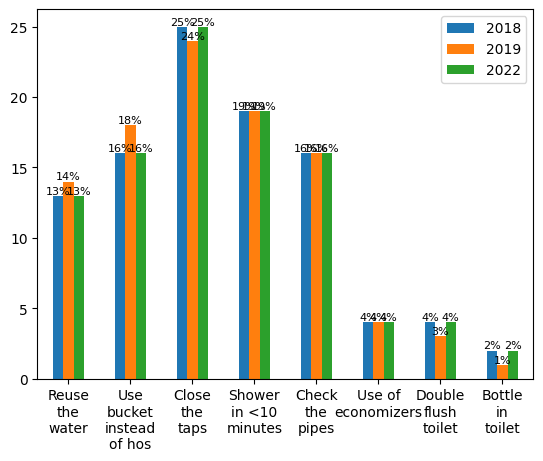

In [22]:
res = {
  2018: [],
  2019: [],
  2022: []
}
res_per = {
  2018: 0,
  2019: 0,
  2022: 0
}

for year in years:
  db = dbs[year]
  tmp = []
  sum = 0
  for col in water_cols:
    db1 = db.loc[db[col] == '1']
    val = db1['fexp4'].sum().round(0)
    tmp.append(val)
    sum += val

  res[year] = tmp
  res_per[year] = sum


for year in res:
  res[year] = list(map(lambda a: round(a/res_per[year]*100), res[year]))

res = pd.DataFrame(res, index=[
  'Reuse\nthe\nwater',
  'Use\nbucket\ninstead\nof hos',
  'Close\nthe\ntaps',
  'Shower\nin <10\nminutes',
  'Check\nthe\npipes',
  'Use of\neconomizers',
  'Double\nflush\ntoilet',
  'Bottle\nin\ntoilet',
  ])
ax = res.plot.bar(rot=0)
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}%', fontsize=8)
res

In [23]:
index = ['Reuse the water', 'Use bucket instead of hos', 'Close the taps', 'Shower in <10 minutes', 'Check the pipes', 'Use of economizers', 'Double flush toilet', 'Bottle in toilet']

fig = go.Figure()

for year in res:
  fig.add_trace(go.Scatterpolar(
    r=res[year],
    theta=index,
    fill='toself',
    name=year
  ))

fig.show()

# Energy saving practice

### Household yearly count related to Energy saving practice

s101p71: ¿Desconectan los aparatos electrónicos y electrodomésticos cuando no los usan?

s101p72: ¿Apagan los focos al salir de una habitación?

s101p73: ¿Introducen los alimentos calientes en el refrigerador?

s101p74: ¿Planchan la mayor cantidad de ropa posible en una sola vez?

s101p75: ¿Abren las cortinas y persianas para aprovechar la luz del sol?

s101p76: ¿Dispone de aparatos electrodomésticos ahorradores de energía (Refrigerador, lavadora, secadora)?

s101p77: ¿Dispone de paneles solares?


In [24]:
energy_cols = ['s101p71', 's101p72', 's101p73', 's101p74', 's101p75', 's101p76', 's101p77']

,years,households
0,2018,4728612.0
1,2019,4553802.0
2,2022,4728612.0


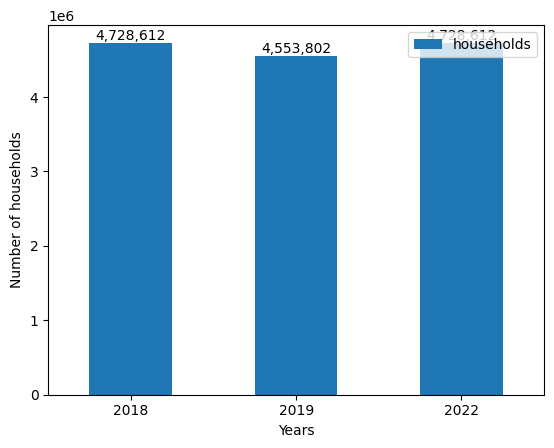

In [25]:
res = []

for year in years:
  db = dbs[year]
  db = db.loc[(db['s101p71'] == '1') | (db['s101p72'] == '1') | (db['s101p73'] == '1') | (db['s101p74'] == '1') | (db['s101p75'] == '1') | (db['s101p76'] == '1') | (db['s101p77'] == '1')]
  res.append(db['fexp4'].sum().round(0))

res = pd.DataFrame({'years':years, 'households':res})
ax = res.plot.bar(x='years', y='households', rot=0, ylabel='Number of households', xlabel='Years')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,Urban,Rural
2018,3307616.0,1420996.0
2019,3184475.0,1369327.0
2022,3307616.0,1420996.0


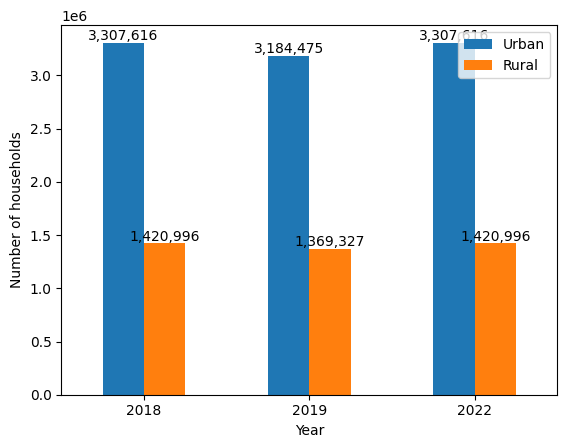

In [26]:
res = []

for year in years:
  db = dbs[year]
  tmp = []
  for area in areas:
    db1 = db.loc[((db['s101p71'] == '1') | (db['s101p72'] == '1') | (db['s101p73'] == '1') | (db['s101p74'] == '1') | (db['s101p75'] == '1') | (db['s101p76'] == '1') | (db['s101p77'] == '1')) & (db['area'] == area)]
    res.append(db1['fexp4'].sum().round(0))

res = pd.DataFrame({'Urban': res[::2], 'Rural': res[1::2]}, index=years)
ax = res.plot.bar(rot=0, ylabel='Number of households', xlabel='Year')
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}')
res

,2018,2019,2022
Q1,22,22,22
Q2,27,28,27
Q3,3,2,3
Q4,11,12,11
Q5,25,25,25
Q6,10,10,10
Q7,1,1,1


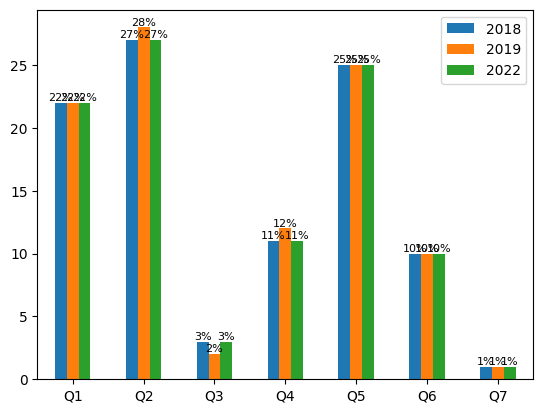

In [27]:
res = {
  2018: [],
  2019: [],
  2022: []
}
res_per = {
  2018: 0,
  2019: 0,
  2022: 0
}
  

for year in years:
  db = dbs[year]
  tmp = []
  sum = 0
  for col in energy_cols:
    db1 = db.loc[db[col] == '1']
    val = db1['fexp4'].sum().round(0)
    tmp.append(val)
    sum += val

  res[year] = tmp
  res_per[year] = sum

for year in res:
  res[year] = list(map(lambda a: round(a/res_per[year]*100), res[year]))

res = pd.DataFrame(res, index=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7'])
ax = res.plot.bar(rot=0)
for container in ax.containers:
  ax.bar_label(container, fmt='{:,.0f}%', fontsize=8)
res

In [28]:
fig = go.Figure()

for year in res:
  fig.add_trace(go.Scatterpolar(
    r=res[year],
    theta=['Disconnect electronic not used devices', 'Turn off room lights', 'Put food in the refrigerator', 'Iron as many clothes as possible in one time', 'Open the curtains for sunlight', 'Have energy-saving household appliances ', 'Have solar panels?'],
    fill='toself',
    name=year
  ))

fig.show()